In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Dense,LSTM
from keras.models import Sequential

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [11]:
data = pd.read_csv('Entire.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2020-12-02 09:53,1.20584,1.20586,1.20577,1.20583,263
1,2020-12-02 09:54,1.20583,1.20586,1.20577,1.20577,230
2,2020-12-02 09:55,1.20575,1.20589,1.20569,1.20586,268
3,2020-12-02 10:00,1.20536,1.20564,1.20530,1.20552,298
4,2020-12-02 10:01,1.20551,1.20563,1.20525,1.20542,481


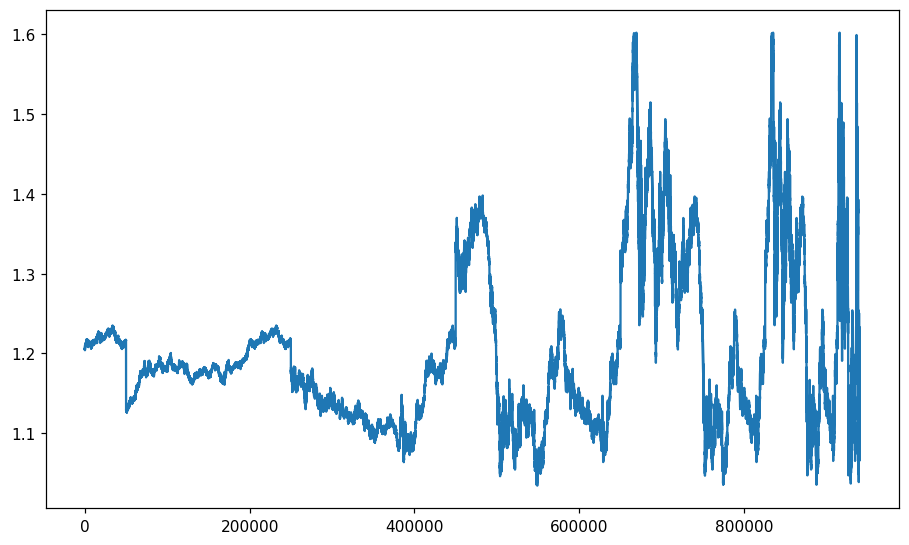

In [12]:
plt.figure(figsize=(10,6),dpi=110)
data['Close'].plot()
plt.show()

In [14]:
features = ['Open','High','Low','Volume']
DATA = data[features]
DATA

,Open,High,Low,Volume
0,1.20584,1.20586,1.20577,263
1,1.20583,1.20586,1.20577,230
2,1.20575,1.20589,1.20569,268
3,1.20536,1.20564,1.20530,298
4,1.20551,1.20563,1.20525,481
...,...,...,...,...
940398,1.20774,1.20867,1.20535,123208
940399,1.20770,1.21448,1.20739,175201
940400,1.21278,1.21581,1.20767,170600
940401,1.21096,1.21730,1.21093,164052


In [16]:
price = data['Close']
price = pd.DataFrame(data=price.values , columns=['Price'])
price

,Price
0,1.20583
1,1.20577
2,1.20586
3,1.20552
4,1.20542
...,...
940398,1.20772
940399,1.21276
940400,1.21094
940401,1.21674


In [15]:
scaller = MinMaxScaler()
data_tf = scaller.fit_transform(DATA)
data_tf = pd.DataFrame(data=data_tf,columns=DATA.columns)
data_tf

,Open,High,Low,Volume
0,0.302269,0.298761,0.303879,0.000088
1,0.302251,0.298761,0.303879,0.000077
2,0.302110,0.298814,0.303737,0.000090
3,0.301422,0.298374,0.303047,0.000100
4,0.301687,0.298356,0.302958,0.000162
...,...,...,...,...
940398,0.305621,0.303712,0.303135,0.041519
940399,0.305551,0.313948,0.306745,0.059040
940400,0.314514,0.316291,0.307240,0.057489
940401,0.311302,0.318916,0.313009,0.055283


In [32]:
timesplit = TimeSeriesSplit(n_splits=5)
for train_idx , test_idx in timesplit.split(data_tf):
    X_train , X_test = data_tf[:len(train_idx)],data_tf[len(train_idx):len(train_idx)+len(test_idx)]
    y_train , y_test = price[:len(train_idx)].values.ravel(),price[len(train_idx):len(train_idx)+len(test_idx)].values.ravel()

In [33]:
X_train

,Open,High,Low,Volume
0,0.302269,0.298761,0.303879,0.000088
1,0.302251,0.298761,0.303879,0.000077
2,0.302110,0.298814,0.303737,0.000090
3,0.301422,0.298374,0.303047,0.000100
4,0.301687,0.298356,0.302958,0.000162
...,...,...,...,...
783665,0.285296,0.282095,0.286627,0.000556
783666,0.285014,0.282130,0.286167,0.000800
783667,0.284502,0.281584,0.285300,0.001777
783668,0.283708,0.280721,0.284079,0.001495


In [34]:
X_test

,Open,High,Low,Volume
783670,0.283584,0.280562,0.284698,0.001184
783671,0.283973,0.280897,0.285264,0.000809
783672,0.284008,0.281813,0.285671,0.000932
783673,0.285119,0.281954,0.286503,0.000763
783674,0.284978,0.281584,0.285494,0.000736
...,...,...,...,...
940398,0.305621,0.303712,0.303135,0.041519
940399,0.305551,0.313948,0.306745,0.059040
940400,0.314514,0.316291,0.307240,0.057489
940401,0.311302,0.318916,0.313009,0.055283


In [35]:
xtrain = np.array(X_train)
xtest = np.array(X_test)
X_train = xtrain.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = xtest.reshape(X_test.shape[0],1,X_test.shape[1])


In [36]:
X_train.shape

(783670, 1, 4)

In [37]:
X_test.shape

(156733, 1, 4)

In [38]:
lstm = Sequential()
lstm.add(LSTM(16,activation='relu',return_sequences=False))
lstm.add(Dense(1))
lstm.compile(optimizer='adam',loss='mean_absolute_error')

In [39]:
lstm.fit(X_train,y_train,batch_size=8,epochs=32,verbose=1)

Epoch 1/32
97959/97959 [==============================] - 192s 2ms/step - loss: 0.0028
Epoch 2/32
97959/97959 [==============================] - 187s 2ms/step - loss: 6.9994e-04
Epoch 3/32
97959/97959 [==============================] - 190s 2ms/step - loss: 6.3509e-04
Epoch 4/32
97959/97959 [==============================] - 193s 2ms/step - loss: 6.1666e-04
Epoch 5/32
97959/97959 [==============================] - 180s 2ms/step - loss: 5.9329e-04
Epoch 6/32
97959/97959 [==============================] - 184s 2ms/step - loss: 5.6663e-04
Epoch 7/32
97959/97959 [==============================] - 194s 2ms/step - loss: 5.4642e-04
Epoch 8/32
97959/97959 [==============================] - 189s 2ms/step - loss: 5.3139e-04
Epoch 9/32
97959/97959 [==============================] - 191s 2ms/step - loss: 5.1071e-04
Epoch 10/32
97959/97959 [==============================] - 158s 2ms/step - loss: 4.9595e-04
Epoch 11/32
97959/97959 [==============================] - 152s 2ms/step - loss: 4.7757e-04
E

In [40]:
predict = lstm.predict(X_test)

4898/4898 [==============================] - 5s 1ms/step


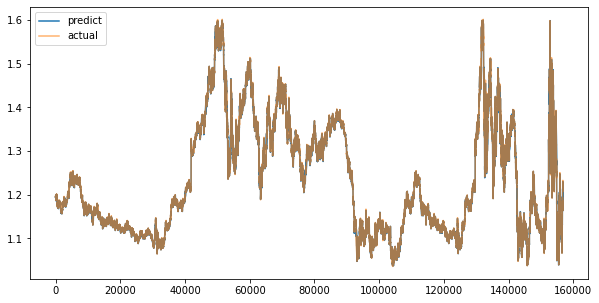

In [44]:
plt.figure(figsize=(10,5))
plt.plot(predict,label='predict')
plt.plot(y_test,label='actual',alpha=0.6)
plt.legend()
plt.show()

In [42]:
r2_score(y_test,predict)

0.9999194081337542